In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [12]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\Alokp\Downloads\DL\dogs_vs_cats\train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
    
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\Alokp\Downloads\DL\dogs_vs_cats\test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

    
)

Found 10390 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [4]:
model=Sequential()

In [5]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
325/325 [==============================] - 1050s 3s/step - loss: 0.6688 - accuracy: 0.5952 - val_loss: 0.6476 - val_accuracy: 0.6438
Epoch 2/2
325/325 [==============================] - 946s 3s/step - loss: 0.6004 - accuracy: 0.6750 - val_loss: 0.6114 - val_accuracy: 0.6812


In [17]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a3/d2/4ce53fc825adfb38b97d91aa1bb99df7b10637c0044302807c00cdee3ad5/matplotlib-3.7.3-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ee/d1/405b6d7a84cfd43cad518bf3d243433d637ada0add65e93110f5f480f86a/fonttools-4.42.1-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.1 kB ? eta -:--:--
     --------- --------------------------- 41.0/154.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 154.1/154.1 kB 1.3 MB/s et

In [18]:
import matplotlib.pyplot as plt

In [20]:
dog_image=plt.imread(r"C:\Users\Alokp\Downloads\DL\single_prediction\dog.9943.jpg")

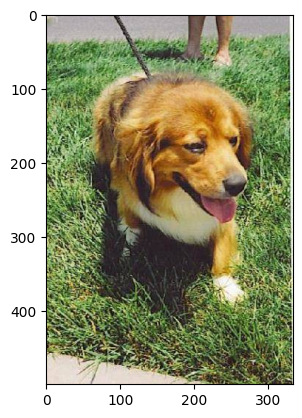

In [21]:
plt.imshow(dog_image)

In [22]:
cat_image=plt.imread(r"C:\Users\Alokp\Downloads\DL\single_prediction\cat.7587.jpg")

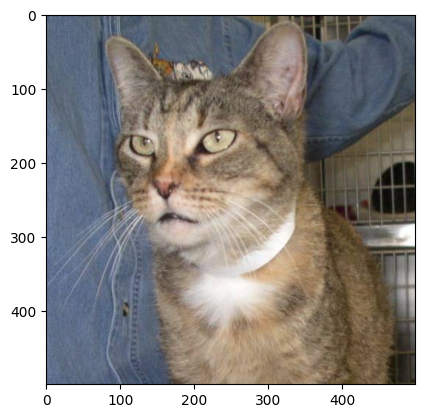

In [23]:
plt.imshow(cat_image)

In [24]:
dog_image.shape

(500, 334, 3)

In [25]:
cat_image.shape

(500, 499, 3)

In [27]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [28]:
dog_resize.shape

(256, 256, 3)

In [29]:
cat_resize.shape

(256, 256, 3)

In [30]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [31]:
dog_resize.shape

(1, 256, 256, 3)

In [32]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [33]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 291ms/step


In [34]:
model.predict(cat_resize)

1/1 [==============================] - 0s 76ms/step


array([[1.]], dtype=float32)

In [35]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog
